Step 1: Import Libraries
- `pandas` → for handling and analyzing tabular data (DataFrames).
- `numpy` → for numerical operations (arrays, math).
- `matplotlib.pyplot` → for creating visual plots and graphs.

- `train_test_split` → to split our dataset into training and test sets.
- `cross_val_score` → to evaluate our model using cross-validation.
- `DecisionTreeClassifier` → to create and train a decision tree model.
- `plot_tree` → to visualize the trained decision tree.
- `RandomForestClassifier` → to create and train a random forest model (an ensemble of trees).
- `accuracy_score`, `classification_report` → to evaluate model performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Step 2: Load Dataset
- We load our Heart Disease dataset from a CSV file into a pandas DataFrame called `df`.
- This dataset contains patient medical attributes and a `target` column indicating presence (1) or absence (0) of heart disease.

In [2]:
df = pd.read_csv("C:/Users/swath/Downloads/Heart-Disease/heart.csv")

Step 3: Preview the Data
- `df.head()` shows the first 5 rows of the dataset.
- Helps us verify that the data loaded correctly and inspect the columns and values.


In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Step 4: Check Column Names
- Prints all column names in the DataFrame.
- Useful to confirm the name of the target variable (`target`) and the feature columns.


In [4]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Step 5: Define Features and Target
- `X` → All columns except 'target' (these are our input features).
- `y` → The 'target' column (this is what we want to predict: 0 or 1).

Step 6: Check Shapes of Features and Target
- Confirms the dimensions of our features (`X`) and labels (`y`).
- Ensures data is correctly separated.

In [5]:
X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1025, 13)
Target shape: (1025,)


Step 7: Train-Test Split
- Splits the dataset into training and test sets.
- 80% training data, 20% testing data (`test_size=0.2`).
- `random_state=42` ensures reproducible splits.

Step 8: Check Train and Test Set Sizes
- Verifies the number of samples in training and test sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (820, 13)
Test size: (205, 13)


Step 9: Train Decision Tree Classifier
- Initializes a DecisionTreeClassifier.
- Fits (trains) the model on the training data.

Step 10: Make Predictions with Decision Tree
- Uses the trained decision tree to predict labels for the test set.

Step 11: Evaluate Decision Tree
- `accuracy_score`: percentage of correct predictions on test data.
- `classification_report`: detailed metrics (precision, recall, F1-score) for each class.

In [7]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Step 12: Visualize the Decision Tree

- Creates a large figure to clearly show the entire tree.
- `plot_tree` displays decision rules, splits, and class outcomes.
- `filled=True` colors nodes by class.


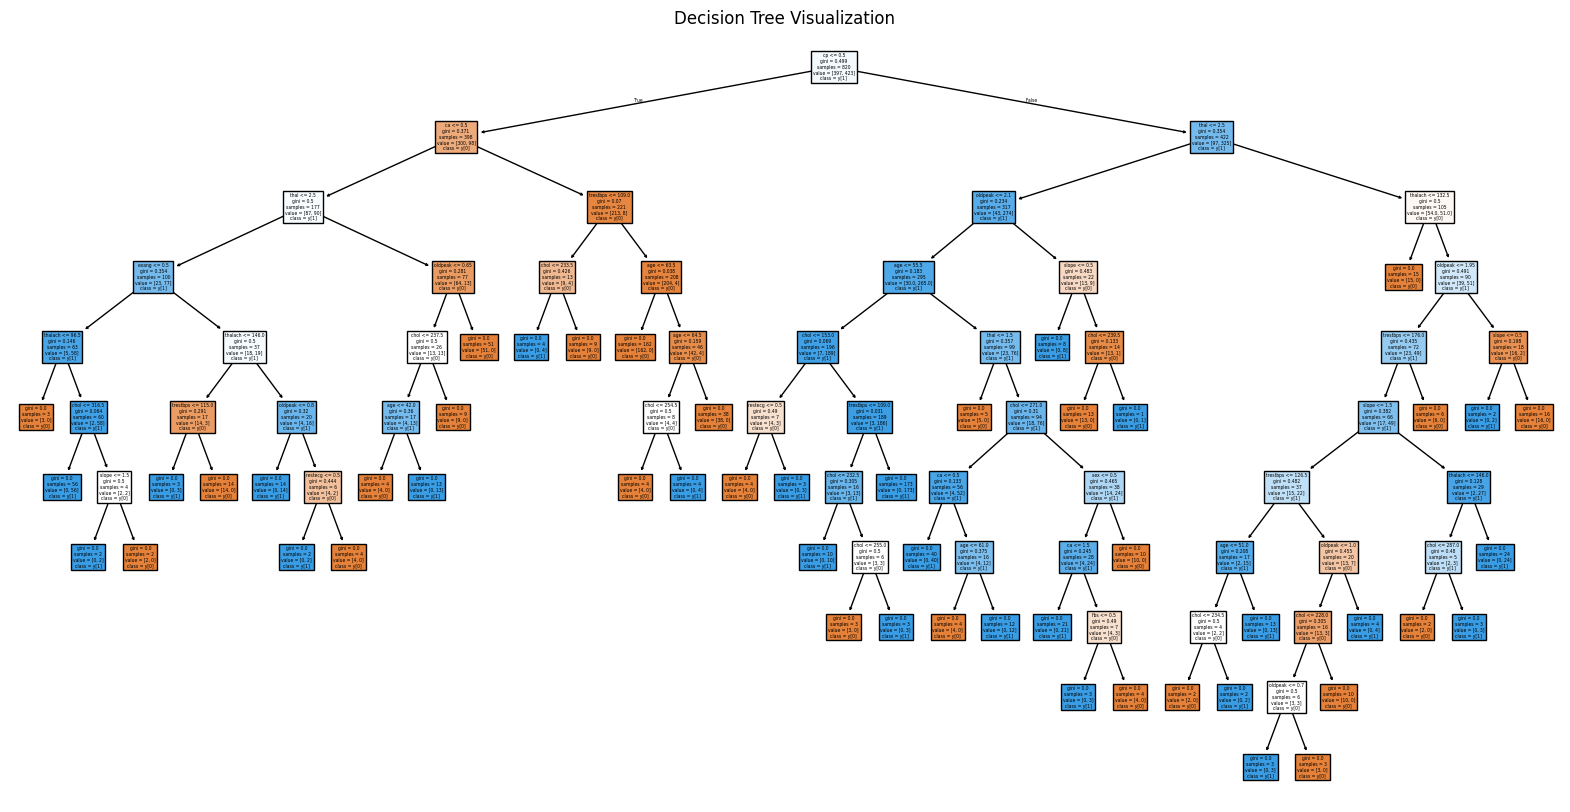

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Step 13: Limit Tree Depth to Prevent Overfitting
- Sets `max_depth=3` to restrict tree complexity.
- Helps avoid overfitting by preventing too many splits.


Step 14: Make Predictions with Limited-Depth Tree
- Uses the shallower tree to predict on test data.

Step 15: Evaluate Limited-Depth Tree
- Checks accuracy on the test set for the pruned tree.
- Typically generalizes better than a deep overfit tree.

Step 16: Compare Train and Test Accuracy

- High train accuracy but much lower test accuracy indicates overfitting.
- A smaller gap suggests better generalization.


In [9]:

dtree_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_limited.fit(X_train, y_train)

y_pred_limited = dtree_limited.predict(X_test)

print("Limited Depth Tree Accuracy:", accuracy_score(y_test, y_pred_limited))

print("Train Accuracy:", dtree_limited.score(X_train, y_train))
print("Test Accuracy:", dtree_limited.score(X_test, y_test))


Limited Depth Tree Accuracy: 0.7804878048780488
Train Accuracy: 0.8512195121951219
Test Accuracy: 0.7804878048780488


Step 17: Train Random Forest Classifier
- RandomForestClassifier builds multiple decision trees (100 here).
- Reduces overfitting by averaging predictions across many trees.

Step 18: Make Predictions with Random Forest
- Predicts the test set outcomes using the trained Random Forest.

Step 19: Evaluate Random Forest
- Measures accuracy and classification metrics.
- Random Forest usually performs better than a single Decision Tree.


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Step 20: Get Feature Importances
- Random Forest computes importance scores for each feature.
- Shows which variables contribute most to predictions.

Step 21: Plot Feature Importances
- Horizontal bar chart of feature importance scores.
- Helps interpret which medical features are most predictive of heart disease.


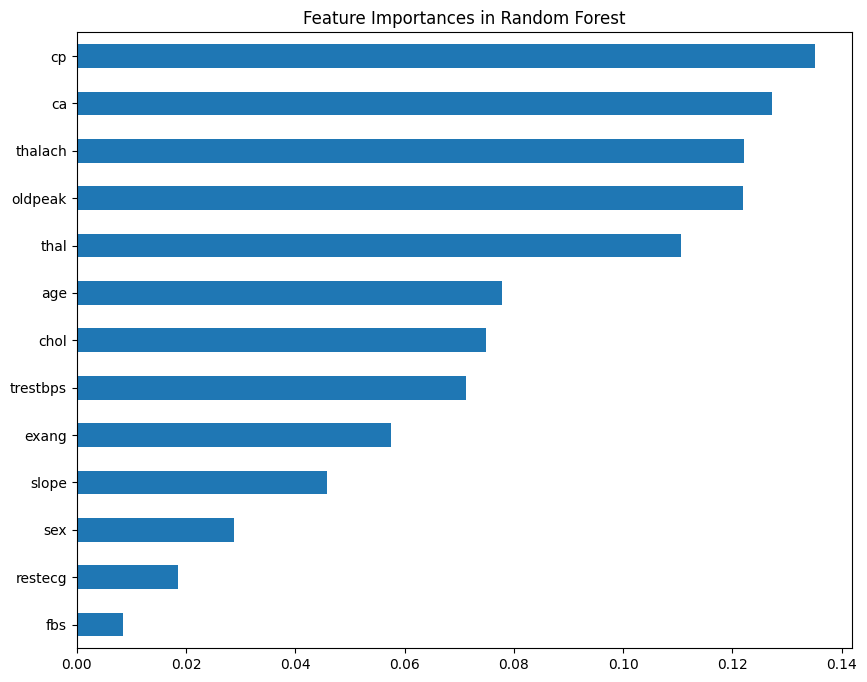

In [11]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10,8))
feat_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances in Random Forest')
plt.show()


Step 22: Cross-Validation
- Performs 5-fold cross-validation to evaluate model stability.
- Splits data into 5 parts, trains on 4, tests on 1, and repeats.
- Mean accuracy gives a more reliable estimate of model performance.

In [12]:
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
